<a href="https://colab.research.google.com/github/Gibransayang/Tugas-kelompok/blob/main/Tugas_Hidup_dan_Mati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [ ]:
url = 'https://raw.githubusercontent.com/kokocamp/vlog101/master/vlog101.csv'
vlog128 = pd.read_csv(url)
vlog128.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            200 non-null    int64 
 1   Sex                   200 non-null    object
 2   Usia                  200 non-null    int64 
 3   Gaji (juta)           200 non-null    int64 
 4   Skor Belanja (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


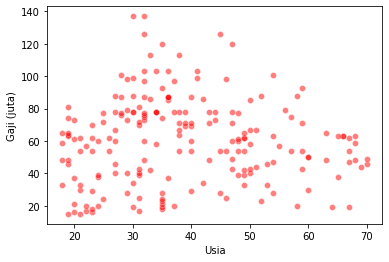

In [ ]:
X = vlog128[['Usia','Gaji (juta)']]
y = vlog128['Skor Belanja (1-100)']
sns.scatterplot(x="Usia",y="Gaji (juta)",data=vlog128,color="red",alpha=0.5)

In [ ]:
n_random = 0
n_kom = 2
perplex = 50
X = np.array(X)
tsne = TSNE(n_components=n_kom, perplexity=perplex).fit_transform(X)
#print(tsne)

n_clusters = 5
kmeans = KMeans(n_clusters)
kmeans.fit(X)
print(kmeans.cluster_centers_)

nc = []
for i in range(n_clusters):
  nc.append(i)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[[ 30.21428571  27.07142857]
 [ 25.06451613  59.48387097]
 [ 37.45454545  78.72727273]
 [ 56.38461538  50.13461538]
 [ 36.6        109.7       ]]


In [ ]:
print(kmeans.labels_)
vlog128["kluster"] = kmeans.labels_
vlog128.head()


[0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 3 0 3 0 0
 0 0 0 3 0 3 0 3 0 3 0 0 0 3 0 0 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 1 3 1 1 3 3 1 3 3 1 3 3 1 1 3 3 1 3 1 1 1 3 1 3 1 1 3 3 1 3 1 3 3 3 3 3
 1 1 1 1 1 3 3 3 2 1 2 2 2 1 2 2 2 3 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


,CustomerID,Sex,Usia,Gaji (juta),Skor Belanja (1-100),kluster
0,1,Pria,19,15,39,0
1,2,Pria,21,15,81,0
2,3,Wanita,20,16,6,0
3,4,Wanita,23,16,77,0
4,5,Wanita,31,17,40,0


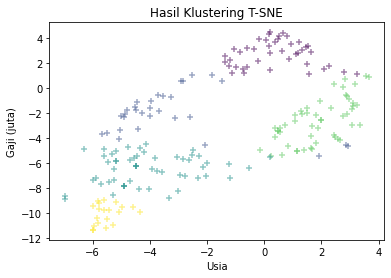

In [ ]:
fig, ax = plt.subplots()
sct = ax.scatter(tsne[:,0],tsne[:,1], c = vlog128.kluster, marker = "+", alpha = 0.5)

plt.title("Hasil Klustering T-SNE")
plt.xlabel("Usia")
plt.ylabel("Gaji (juta)")
plt.show()

In [ ]:
usia = input("Usia (thn): ")
usia = int(usia)
gaji = input("Gaji (juta): ")
gaji = int(gaji)
data = [usia,gaji]
hasil = kmeans.predict([data])
print("Prediksi Kluster (0-4): ", hasil)

Usia (thn): 55
Gaji (juta): 15
Prediksi Kluster (0-4):  [0]


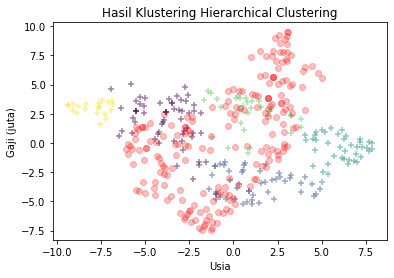

In [ ]:
data = np.array([data])
fig, ax = plt.subplots()
sct = ax.scatter(tsne[:,0],tsne[:,1], c = vlog128.kluster, marker = "+", alpha = 0.5)
plt.title("Hasil Klustering Hierarchical Clustering")
plt.xlabel("Usia")
plt.ylabel("Gaji (juta)")

xx = np.append(X,data,axis=0)
tsne2 = TSNE(n_components=n_kom, perplexity=perplex).fit_transform(xx)

#plt.scatter(tsne2[-1,0],tsne2[-1,1], c = "red", s=100)
plt.scatter(tsne2[:,0],tsne2[:,1], marker = "o", c = "red", alpha = 0.25)
plt.show()

#print(tsne2)